##Team members:
Simon Wang (ssw8641)

Mengya Qiu (mq583)

Bo Su (bs3957)

Binfang Ye (by2034)

##Background
League of Legends (hereinafter called LOL), which is a multiple online battle game with two different
teams in one game, enjoys popularity in the world. There are many organizations holding LOL
competitions but it is hard to tell who will win the game until one team takes down another team’s
Nexus at the end. We are interested in predicting who will win the game in 10 mins based on some features
such as “first blood”, “kills”, “deaths”, and etc. The data is collected in the first 10mins of the game.
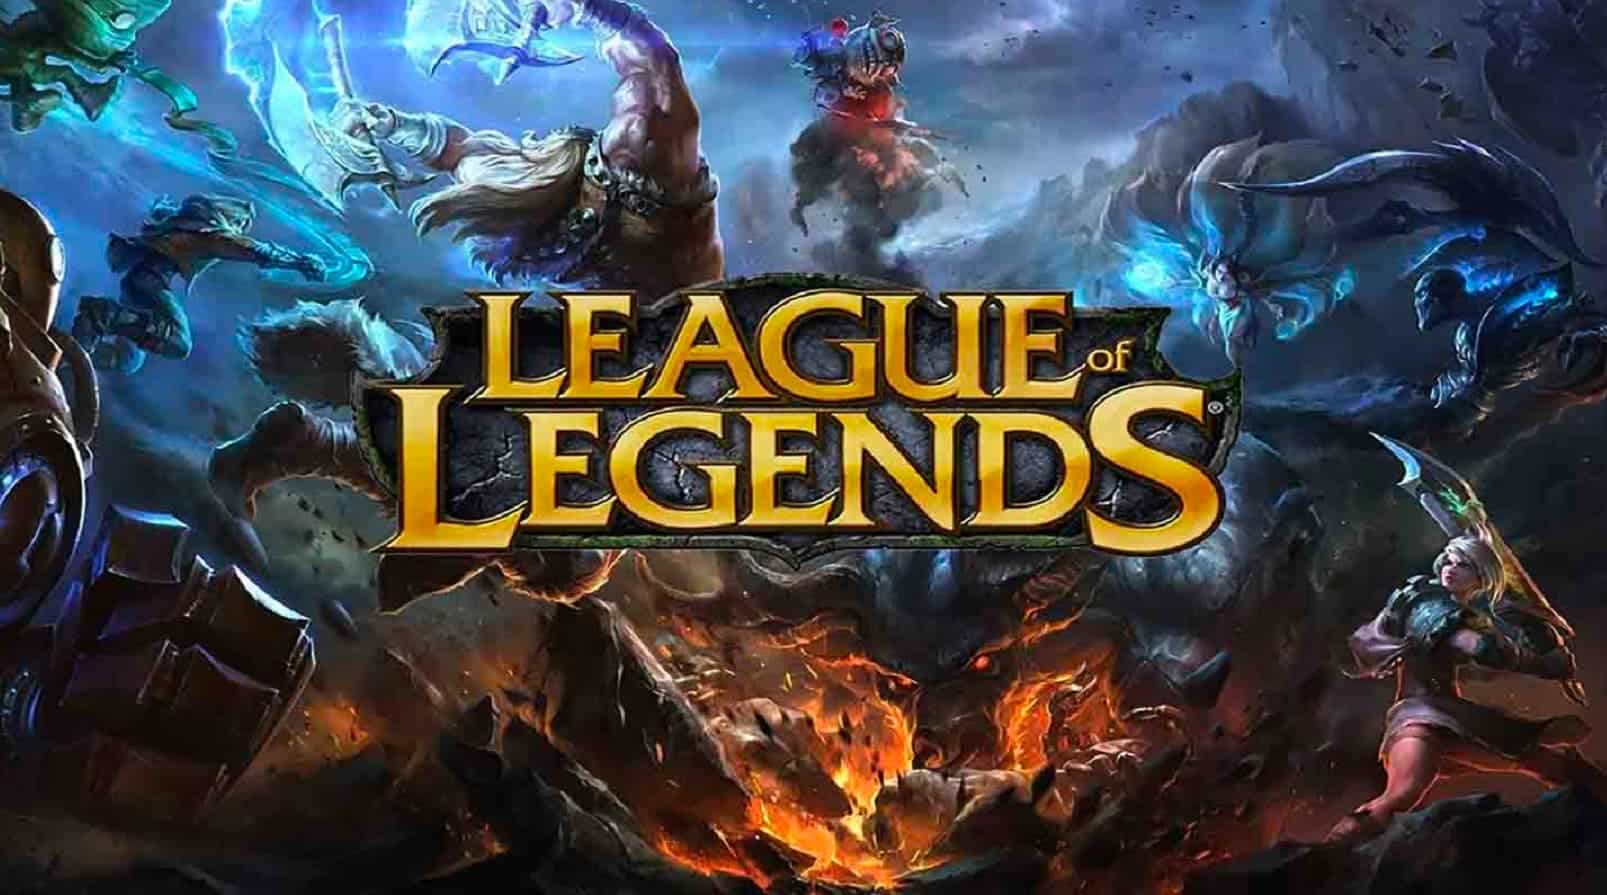

#####the image is from: https://cdn1.dotesports.com/wp-content/uploads/2019/09/12195522/league-of-legends.jpg

We first download some basic packages.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Load and Visualize the Data
First load data from 'https://raw.githubusercontent.com/yeb2Binfang/20MLproj/main/high_diamond_ranked_10min.csv'

This dataset contains the first 10 min statistics of roughly 10k games. There are 19 features
collected in 10min in-game for both red & blue teams respectively. The column ‘blueWins’ is the
target variable we are trying to predict: A value of 1 means the blue team has won and otherwise 0.
Besides these 39 features, there is a unique gameid assigned to each unique game. Hence there
are 40 columns in total.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/yeb2Binfang/20MLproj/main/high_diamond_ranked_10min.csv')

In [ ]:
df.head(6)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
5,4475365709,1,18,0,0,5,3,6,1,1,0,0,15899,7.0,18161,225,42,698,101,22.5,1589.9,36,5,1,3,5,2,0,0,0,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1


In [ ]:
df.shape

(9879, 40)

In [ ]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

Save every column except for `gameId` and `blueWins` in a matrix as input samples X. Save `blueWins` column in a vector as output y.

In [ ]:
#TODO
# Samples
xnames = df.columns[2:]
X = np.array(df[xnames])
# Target
y = np.array(df["blueWins"])

# Use .shape and print how many features and how many data entries are there
# save as nsamp, nfeatures
nsamp, nfea = X.shape
nout = y.shape
print('Number of samples = %d,  number of features = %d' % (nsamp,nfea))
print('Number of outputs = %d' % nout)


Number of samples = 9879,  number of features = 38
Number of outputs = 9879


Then split the data into training and test.  Use the `train_test_split` function with `test_size=0.25`. Save as Xtr, Xts, ytr, yts.


In [ ]:
# Split the data into training and testing.
from sklearn.model_selection import train_test_split

Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.25) 
print(Xtr.shape)
print(ytr.shape)
print(Xts.shape)
print(yts.shape)

(7409, 38)
(7409,)
(2470, 38)
(2470,)


In [ ]:
ytr[:10]

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0])

## Perform Logistics

In [ ]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn import linear_model, preprocessing
from sklearn.preprocessing import StandardScaler


###Logistics model

In [ ]:
logreg = linear_model.LogisticRegression(max_iter=1000)

scal = StandardScaler()
Xtr1 = scal.fit_transform(Xtr)
Xts1 = scal.transform(Xts)

#fit model
logreg.fit(Xtr1, ytr)
yhat = logreg.predict(Xts1)
acc = np.mean(yhat ==yts)
print("the accuracy of Logistics model is: {0:2.5f}".format(acc))

the accuracy of Logistics model is: 0.72915




```
# This is formatted as code
```

###Perform logistics model with lasso

In [ ]:
from sklearn.model_selection import KFold
logreg_lasso = linear_model.LogisticRegression(penalty='l1', solver='liblinear' ,max_iter=1000)

#k-fold cross validation
nfold = 10
kf = KFold(n_splits=nfold, shuffle= True)

#choose C_test value
nVal = 30
C_test = np.logspace(-3,3,nVal)
acc_lasso = np.zeros((nVal,nfold))


for i, I in enumerate(kf.split(X)):

  train, test = I
  Xtr = X[train,:]
  ytr = y[train]
  Xts = X[test,:]
  yts = y[test]

  scal = StandardScaler()
  Xtr1 = scal.fit_transform(Xtr)
  Xts1 = scal.transform(Xts)

  for ival, c in enumerate(C_test):
    logreg_lasso.C = c
    logreg_lasso.fit(Xtr1, ytr)
    yhat = logreg_lasso.predict(Xts1)
    acc_lasso[ival, i] = np.mean(yhat ==yts)
  print("Fold %d" % i)



Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9


In [ ]:
accm_lasso = np.zeros(acc_lasso.shape[0])
for i in range(acc_lasso.shape[0]):
  accm_lasso[i] = np.mean(acc_lasso[i,:])
im = np.argmax(accm_lasso)
print("the best accuracy using logistic with lasso is: {0:2.5f}".format(accm_lasso[im]))
print("the best c is: {0:2.5f}".format(C_test[im]))


the best accuracy using logistic with lasso is: 0.73398
the best c is: 0.00672


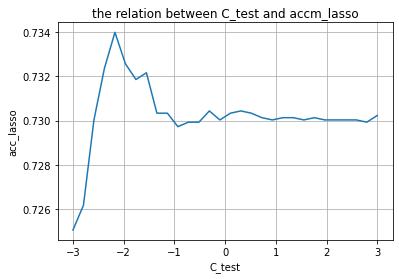

In [ ]:
plt.plot(np.log10(C_test), accm_lasso)
plt.xlabel("C_test")
plt.ylabel("acc_lasso")
plt.title("the relation between C_test and accm_lasso")
plt.grid()

We choose C value we got above to see what features could be reduced

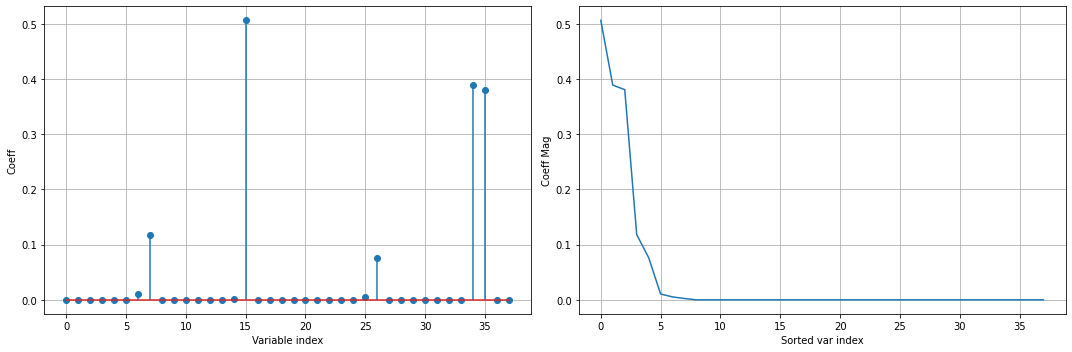

In [ ]:
logreg_lasso = linear_model.LogisticRegression(penalty='l1', C = C_test[im], solver='liblinear' ,max_iter=1000)
logreg_lasso.fit(Xtr1, ytr)

w = np.transpose(logreg_lasso.coef_)
warms = np.zeros(w.shape[0])
for i in range(w.shape[0]):
  warms[i] = np.sqrt(np.sum(w[i,:]**2))


coeff_lasso_norm = warms
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.stem(coeff_lasso_norm, use_line_collection=True)
plt.xlabel('Variable index')
plt.ylabel('Coeff')
plt.grid()


plt.subplot(1,2,2)
coeff_sort_ls = np.flipud(np.sort(np.abs(coeff_lasso_norm)))
plt.plot(coeff_sort_ls)
plt.xlabel('Sorted var index')
plt.ylabel('Coeff Mag')
plt.grid()
plt.tight_layout()


After using L1 regularization, we can see that many features can be reduced from above two figures. 

In [ ]:
Ils = np.argsort(np.abs(coeff_lasso_norm))
Ils = np.flipud(Ils)

nprint = 10
print('|Lasso with Logistics         ')
print('|-----------------------------')
for i in range(nprint):
    jls = Ils[i]
    print('|%20s %7.2f ' % (xnames[jls], coeff_lasso_norm[jls]))

|Lasso with Logistics         
|-----------------------------
|        blueGoldDiff    0.51 
|         redGoldDiff    0.39 
|   redExperienceDiff    0.38 
|         blueDragons    0.12 
|          redDragons    0.08 
|   blueEliteMonsters    0.01 
|    redEliteMonsters    0.01 
|blueTotalJungleMinionsKilled    0.00 
| blueTowersDestroyed    0.00 
|blueTotalMinionsKilled    0.00 


It is useful to print the variable names of the top 10 coefficients for  the Lasso model with logistics regression. We see that 5 game variables:`blueGoldDiff` , `redGoldDiff`, `blueExperienceDiff`, `blueDragons` ,`redExperienceDiff` have decisive effect on the final result of a game.

## Perform PCA for Visualization

Before performing PCA, we need to scale the data matrix to remove the mean and normalize the variance of the different components.  For this purpose, create a `StandardScaling` object `scaling`.  Then `fit` the scaling with the entire data `X`.  Transform the data and let `Xs` be the scaled data.

In [ ]:
from sklearn.preprocessing import StandardScaler

# TODO
scaling = StandardScaler()
# Xs = scaling.fit(X)
scaling.fit(X)
Xs = scaling.transform(X)

Next, fit a PCA on the scaled data matrix Xs. Here we use the sklearn PCA method. Select svd_solver='randomized' and whiten=True. Use the the pca.transform method to find, Z, the coefficients of Xs in the PCA basis.

In [ ]:
from sklearn.decomposition import PCA

# TODO
ncomp = 2

# Construct the PCA object
# pca = PCA(...)
pca = PCA(n_components=ncomp, 
          svd_solver='randomized', whiten=True)

# Fit the PCA components on the entire dataset
pca.fit(Xs)

# Find the coefficients of Xs in the PCA basis.
Z =  pca.transform(Xs)
Vtr = pca.components_  
Z.shape

(9879, 2)

In the transformed basis, each data sample is represented by a two dimensional vector, `Z[i,0], Z[i,1]`. Plot a scatter plot of the transformed data.

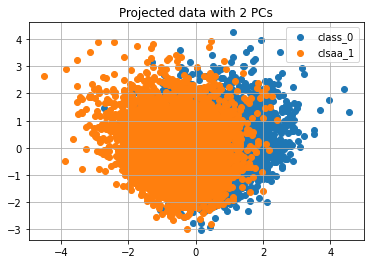

In [ ]:
# TODO
# Note that for binary classification there are 2 classes. 
I0 = np.where(y==0)
I1 = np.where(y==1)
plt.scatter(Z[I0,0],Z[I0,1])
plt.scatter(Z[I1,0],Z[I1,1])
plt.legend(['class_0', 'clsaa_1'])
plt.title('Projected data with 2 PCs')
plt.grid()

## Finding the PoV

In order to find out whether our data is feasible to implement PCA methods, we plot the PoV. 

In [ ]:
# Remove the mean from the data
xm = np.mean(Xs,axis=0)
Xm = Xs - xm[None,:]
ns = Xm.shape[0]
# Compute the covariance matrix
Q = 1/ns*(Xm.T.dot(Xm))

# Compute the eigenvalues and the largest eigenvector
lam, V = np.linalg.eigh(Q)

lamf = np.flipud(lam)

Text(0, 0.5, 'PoV')

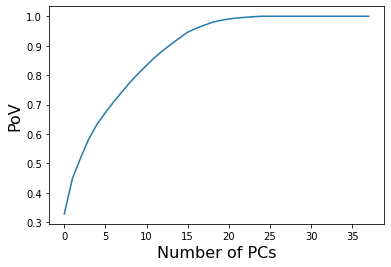

In [ ]:
s = sum(lamf)
l = np.zeros(38)
ls=0
for i,lam in enumerate(lamf):
  ls = ls + lam
  l[i]=ls
  #print(l[i])
plt.plot(l/s)
plt.xlabel('Number of PCs',fontsize=16)
plt.ylabel('PoV',fontsize=16)

## Using PCA with Classificaiton
We will now use data scaling and PCA as a pre-processing step for logistic classification.  The number of PCs to use can be found with cross-validation.  We will try different number of PCs components to use and measures the test accuracy for each value. Then we determine the optimal PCs to use with the highest test accuracy.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
nfold = 5

# Create a K-fold object
kf = KFold(n_splits=nfold, shuffle=True)
kf.get_n_splits(X)

# Number of PCs to try
ncomp_test = np.arange(2,30)
num_nc = len(ncomp_test)

# Accuracy:  acc[icomp,ifold]  is test accuracy when using `ncomp = ncomp_test[icomp]` in fold `ifold`.
acc = np.zeros((num_nc,nfold))

# Loop over number of components to test
for icomp, ncomp in enumerate(ncomp_test):
    
    # Look over the folds
    for ifold, I in enumerate(kf.split(X)):
        Itr, Its = I

        # TODO:  Split data into training 
        Xtr = X[Itr]
        ytr = y[Itr]
        Xts = X[Its]
        yts = y[Its]

        # TODO:  Create a scaling object and fit the scaling on the training data
        scaling = StandardScaler()
        scaling.fit(Xtr)
        Xtrs = scaling.transform(Xtr)
        Xtss = scaling.transform(Xts)

        # TODO:  Fit the PCA on the scaled training data
        pca = PCA(n_components=ncomp, svd_solver='randomized', whiten=True)
        pca.fit(Xtrs)

        Ztr =  pca.transform(Xtrs)

        # TODO:  Train a classifier on the transformed training data
        # Use a logistic regression classifier
        logreg = LogisticRegression(multi_class='auto', solver='lbfgs')
        logreg.fit(Ztr, ytr)

        # TODO:  Transform the test data through data scaler and PCA    
        Zts = pca.transform(Xtss)

        # TODO:  Predict the labels the test data
        yhat = logreg.predict(Zts)
        
        # TODO:  Measure the accuracy 
        acc[icomp, ifold] = np.mean(yhat==yts)
        print('num_nc=%d nfold=%d acc=%12.4e' % (icomp+1, ifold, acc[icomp,ifold]) )



num_nc=1 nfold=0 acc=  7.2267e-01
num_nc=1 nfold=1 acc=  7.3684e-01
num_nc=1 nfold=2 acc=  7.3128e-01
num_nc=1 nfold=3 acc=  7.3785e-01
num_nc=1 nfold=4 acc=  7.2304e-01
num_nc=2 nfold=0 acc=  7.3634e-01
num_nc=2 nfold=1 acc=  7.1255e-01
num_nc=2 nfold=2 acc=  7.2470e-01
num_nc=2 nfold=3 acc=  7.3937e-01
num_nc=2 nfold=4 acc=  7.2152e-01
num_nc=3 nfold=0 acc=  7.3279e-01
num_nc=3 nfold=1 acc=  7.3128e-01
num_nc=3 nfold=2 acc=  7.2723e-01
num_nc=3 nfold=3 acc=  7.3178e-01
num_nc=3 nfold=4 acc=  7.2101e-01
num_nc=4 nfold=0 acc=  7.2621e-01
num_nc=4 nfold=1 acc=  7.2621e-01
num_nc=4 nfold=2 acc=  7.3634e-01
num_nc=4 nfold=3 acc=  7.2267e-01
num_nc=4 nfold=4 acc=  7.3114e-01
num_nc=5 nfold=0 acc=  7.3937e-01
num_nc=5 nfold=1 acc=  7.3431e-01
num_nc=5 nfold=2 acc=  7.3178e-01
num_nc=5 nfold=3 acc=  7.2824e-01
num_nc=5 nfold=4 acc=  7.1696e-01
num_nc=6 nfold=0 acc=  7.2976e-01
num_nc=6 nfold=1 acc=  7.2824e-01
num_nc=6 nfold=2 acc=  7.3887e-01
num_nc=6 nfold=3 acc=  7.1559e-01
num_nc=6 nfold

Here, we use the plt.errorbar function to plot the mean accuracy with error bars corresponding to the standard error of the accuracy as a function of the number of components. We try to find the optimal number of PCs to use the normal rule

The optimal order with the normal rule is 28
The best accuracy with the normal rule is 0.733170


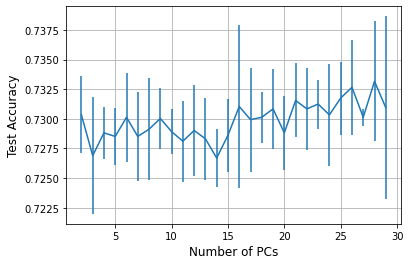

In [ ]:
# TODO:
acc_mean = np.mean(acc, axis = 1)
acc_se = np.std(acc,axis=1)/np.sqrt(nfold-1)
plt.errorbar(ncomp_test, acc_mean, yerr=acc_se, fmt='-')
plt.xlabel('Number of PCs', fontsize = 12)
plt.ylabel('Test Accuracy', fontsize = 12)
plt.grid()

# TODO:  Optimal order with the normal rule
Iopt = np.argmax(acc_mean)
print("The optimal order with the normal rule is {0:d}".format(ncomp_test[Iopt]))
print("The best accuracy with the normal rule is {0:f}".format(acc_mean[Iopt]))

## SVM.svc model

Before fitting the model, we scale the data first, because the values vary a lot from different features. 

In [ ]:
from sklearn.preprocessing import StandardScaler
# TODO
scaling = StandardScaler()
# Xs = scaling.fit(X)
scaling.fit(Xtr)
Xtr1 = scaling.transform(Xtr)
Xts1 = scaling.transform(Xts)

According to the computation before, we chose the number of PCs to be 23.

In [ ]:
from sklearn.decomposition import PCA

# TODO
ncomp = 23

# Construct the PCA object
# pca = PCA(...)
pca = PCA(n_components=ncomp, 
          svd_solver='randomized', whiten=True)

# Fit the PCA components on the entire dataset
pca.fit(Xtr1)

# Find the coefficients of Xs in the PCA basis.
Ztr =  pca.transform(Xtr1)
Zts =  pca.transform(Xts1)
Vtr = pca.components_  
Ztr.shape

(7409, 23)

Now, we use the PCs to fit the svm model. 
We create a svm classifier using rbf kernel with C = 0.1, gamma = 0.02.

In [ ]:
from sklearn import svm

In [ ]:
svc = svm.SVC(probability=False, kernel="rbf", C=0.1, gamma = 0.02, verbose=10)

In [ ]:
svc.fit(Ztr,ytr)

[LibSVM]

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.02, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=10)

In [ ]:
yhat= svc.predict(Zts)
accu = np.sum(yhat==yts)/yhat.shape[0]

Then, we print the accuracy of the classification.

In [ ]:
print("accuracy: %0.3f" %(accu))

accuracy: 0.721


In [ ]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(yts,yhat)
print(c)

[[904 364]
 [324 878]]


From the comfusion matrix, we can know that for both classes, there are around 1/3 test samples being misclassified. We are trying to use different C and gamma values to see if it can get improved. 

Now, we use cross-validation to futher determine optimal C and gamma.

In [ ]:
C_test = [0.1,1,10]
gam_test = [0.001,0.01,0.2]

nC = len(C_test)
ngam = len(gam_test)
acc_svm = np.zeros((nC,ngam))

# TODO:  Measure and print the accuracy for each C and gamma value.  Store the results in acc
for i, C in enumerate(C_test):
    for j, gam in enumerate(gam_test):
        
        # Create the SVC
        svc = svm.SVC(probability=False,  kernel="rbf", C=C, gamma=gam,verbose=10)
        
        # Fit the data        
        svc.fit(Ztr,ytr)
        
        # Predict 
        yhat = svc.predict(Zts)
        acc_svm[i,j] = np.mean(yhat == yts)
        print('C=%12.4e      gam=%12.4e     acc=%f' % (C,gam,acc_svm[i,j]))  

[LibSVM]C=  1.0000e-01      gam=  1.0000e-03     acc=0.721053
[LibSVM]C=  1.0000e-01      gam=  1.0000e-02     acc=0.721457
[LibSVM]C=  1.0000e-01      gam=  2.0000e-01     acc=0.640081
[LibSVM]C=  1.0000e+00      gam=  1.0000e-03     acc=0.719838
[LibSVM]C=  1.0000e+00      gam=  1.0000e-02     acc=0.719838
[LibSVM]C=  1.0000e+00      gam=  2.0000e-01     acc=0.693927
[LibSVM]C=  1.0000e+01      gam=  1.0000e-03     acc=0.721457
[LibSVM]C=  1.0000e+01      gam=  1.0000e-02     acc=0.708097
[LibSVM]C=  1.0000e+01      gam=  2.0000e-01     acc=0.677733


We first print the accuracy matrix. Then, in order to visualize the influence of C and gamma, we plot the accuracy over gamma and C values.




[[0.721 0.721 0.64 ]
 [0.72  0.72  0.694]
 [0.721 0.708 0.678]]


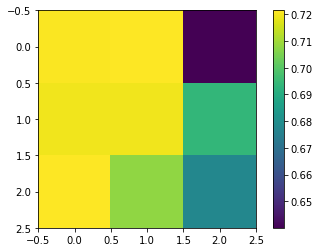

In [ ]:
print(np.array_str(acc_svm, precision=3, suppress_small=True))
plt.imshow(acc_svm, interpolation='none')
plt.colorbar()

Now, we find the optimal C and gamma, and print the accuracy under optimal C and gamma.

In [ ]:
accmax= np.where(acc_svm==np.max(acc_svm))
nC_opt = C_test[accmax[0][0]]
print("Best C: ", nC_opt)
ngamma = gam_test[accmax[1][0]]
print("Best gamma: ", ngamma)
print("Accuracy under optimal C and gamma values = %0.5f" % np.max(acc_svm))

Best C:  0.1
Best gamma:  0.01
Accuracy under optimal C and gamma values = 0.72146


##Conclusion
We compared three models: Logistics without regularizations, Logistics with Lasso, and SVM with PCA. In the first model （logistics model）, we took use of all features and the accuracy is 0.72915. In the second model (logistics model with Lasso), we tried to reduce some features to improve the accuracy and to see what features can be reduced so that we uses L1 regularization and it came out that the accuracy is 0.73398 if we used C=0.00672. From the graph we got above, many of features can be reduced and the accuracy actually improves a little bit. In the last model (SVM), we used PCA technique to do the dimension reduction. After the calculation, we found that 23 PCs can get the best result so that we used it to fit SVM model with C = 0.1 and gamma = 0.01. We got the accuray is 0.72146. We compared three different models which have similar accuracy results but reducing some dimensions can help improve a little. 


##Reference
https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min